In [1]:
import pandas as pd
pd.set_option('max_columns',60)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Preprocessing
## Loading Data as a Pandas Dataframe¶

In [2]:
# Load the data
file_jobs= np.load('jobs.npz')

# Features
cols = list('x_{}'.format(i) for i in range(17))
features_jobs = pd.DataFrame(file_jobs['x'], columns=cols)

# Treatment Variable
t_jobs = pd.DataFrame(file_jobs['t'], columns=['t'])

# Outcome Data
y_jobs = pd.DataFrame(file_jobs['y'], columns=['y'])

# experimental or observational data
e_jobs = pd.DataFrame(file_jobs['e'], columns=['e'])

# Merging all together
df_jobs = pd.concat([features_jobs,t_jobs,y_jobs,e_jobs],1)

In [3]:
df_jobs.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0,1,0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0,1,0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0,1,0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0,1,1
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0,1,0


In [4]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     3212 non-null   float64
 1   x_1     3212 non-null   float64
 2   x_2     3212 non-null   float64
 3   x_3     3212 non-null   float64
 4   x_4     3212 non-null   float64
 5   x_5     3212 non-null   float64
 6   x_6     3212 non-null   float64
 7   x_7     3212 non-null   float64
 8   x_8     3212 non-null   float64
 9   x_9     3212 non-null   float64
 10  x_10    3212 non-null   float64
 11  x_11    3212 non-null   float64
 12  x_12    3212 non-null   float64
 13  x_13    3212 non-null   float64
 14  x_14    3212 non-null   float64
 15  x_15    3212 non-null   float64
 16  x_16    3212 non-null   float64
 17  t       3212 non-null   uint8  
 18  y       3212 non-null   uint8  
 19  e       3212 non-null   uint8  
dtypes: float64(17), uint8(3)
memory usage: 436.1 KB


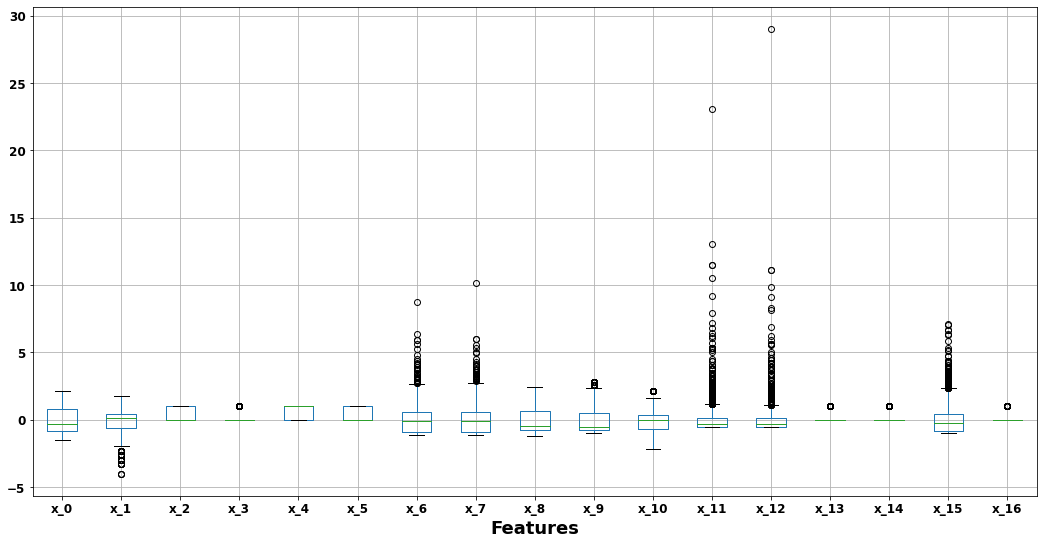

In [5]:
features_jobs.boxplot(figsize=(18,9))
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.xlabel('Features', fontsize= 18, weight='bold')
plt.show()

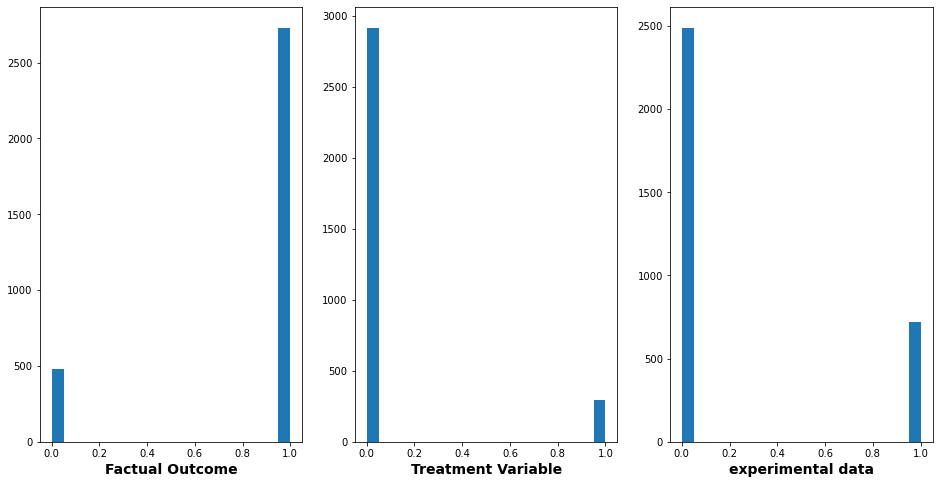

In [6]:
bins=20
fig, ax = plt.subplots(1,3, figsize=(16, 8))

ax[0].hist(y_jobs['y'], bins=bins)
ax[0].set_xlabel('Factual Outcome', fontsize=14,weight='bold')
ax[1].hist(t_jobs['t'], bins=bins)
ax[1].set_xlabel('Treatment Variable', fontsize=14,weight='bold')
ax[2].hist(e_jobs['e'], bins=bins)
ax[2].set_xlabel('experimental data', fontsize=14,weight='bold')

plt.show()

In [7]:
# drop outliers based on IQR method (6)

# Find upper and lower bounds
# def range_keep(column):
#     sorted(column)
#     Q1,Q3 = np.percentile(column , [25,75]) # 25th to 75th percentile (interquartile range)
#     IQR = Q3 - Q1
#     lower_range = Q1 - (6 * IQR)
#     upper_range = Q3 + (6 * IQR)
#     return lower_range, upper_range

# for col in list(df_jobs.columns):
#     lower_range, upper_range = range_keep(df_jobs[col])
#     df_jobs_temp = df_jobs.drop(df_jobs[(df_jobs[col] > upper_range) | (df_jobs[col] < lower_range)].index)

In [8]:
# print('The total number of observations that are dropped due to the outliers issue is:',
#       np.size(df_jobs.y) - np.size(df_jobs_temp.y))

In [9]:
# Summary stats

df_jobs.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.480374e-16,-4.284573e-16,0.374222,0.048879,0.707970,0.411893,-1.157923e-16,3.076272e-17,3.456485e-18,1.759842e-14,-2.662574e-16,-8.364694e-18,8.731081e-17,0.168742,0.167497,2.475189e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


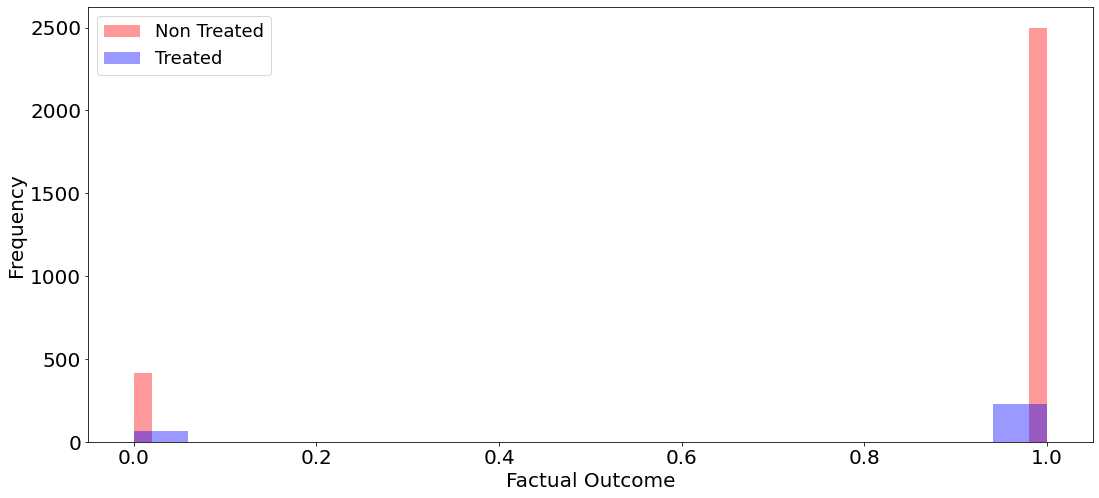

In [17]:
# Plot the distribution for Factual outcomes Based on Whether they Received Tretment
sns.distplot(df_jobs.y[df_jobs['t']==0], color='r',kde=False, label="Non Treated")
sns.distplot(df_jobs.y[df_jobs['t']==1], color='b',kde=False, label="Treated")
fig = plt.gcf()
# plt.title('Figure 16 - Positivity Check', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Factual Outcome',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.legend(fontsize=18, loc='best')
fig.set_size_inches(18, 8)

plt.savefig('Fig03-A.pdf', bbox_inches = 'tight')
plt.savefig('Fig03-A.jpg', bbox_inches = 'tight')

plt.show()

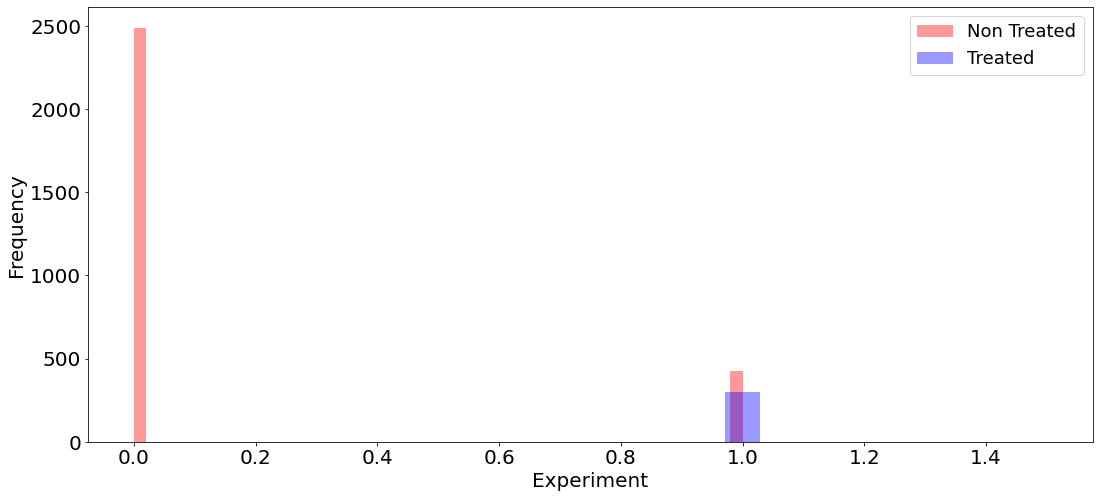

In [18]:
# Plot the distribution for Factual outcomes Based on Whether they Received Tretment
sns.distplot(df_jobs.e[df_jobs['t']==0], color='r',kde=False, label="Non Treated")
sns.distplot(df_jobs.e[df_jobs['t']==1], color='b',kde=False, label="Treated")
fig = plt.gcf()
# plt.title('Figure 16 - Positivity Check', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Experiment',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.legend(fontsize=18, loc='best')
fig.set_size_inches(18, 8)

plt.savefig('Fig03-B.pdf', bbox_inches = 'tight')
plt.savefig('Fig03-B.jpg', bbox_inches = 'tight')

plt.show()

The above graphs confirm our need to use X-learner. There is clear inbalance towards the treatment and control groups in both datasets, hopefully X-learner should be able to deal with this when calculating our CATE value.

In [21]:
# pip install econml

In [146]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from econml.metalearners import XLearner
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [23]:
X_jobs_tr,  X_jobs_ts, t_jobs_tr,  t_jobs_ts, y_jobs_tr, y_jobs_ts , e_jobs_tr, e_jobs_ts = \
train_test_split(features_jobs, t_jobs, y_jobs,e_jobs, test_size=0.2)

# RFC , GBC

In [24]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [25]:
X_jobs_tr_merged = pd.concat([X_jobs_tr , t_jobs_tr],1)
X_jobs_ts_merged = pd.concat([X_jobs_ts , t_jobs_ts],1)

In [26]:
mdl_rfc = rfc.fit(X_jobs_tr_merged, y_jobs_tr)
mdl_gbc = gbc.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


# Metric Evaluation
JOBS dataset wil be evaluated using $\epsilon_{ATT}$and Rpol (policy_risk). These measures require couterfactual data is not available

# Regression Model

Use RFC, GBC

In [27]:
from MetricsFunc import epsilon_att , policy_risk

In [29]:
X_jobs_ts_temp = X_jobs_ts_merged.drop('t', 1).copy()

# Training the Models

## RFC

In [ ]:
#t=0
x_zeros = np.concatenate([X_jobs_ts_temp, np.zeros_like(t_jobs_ts)], axis = 1)
y_hat_jobs_0 = mdl_rfc.predict(x_zeros)
y_hat_jobs_0 = np.int8(y_hat_jobs_0)
#t=1
x_ones = np.concatenate([X_jobs_ts_temp, np.ones_like(t_jobs_ts)], axis = 1)
y_hat_jobs_1 = mdl_rfc.predict(x_ones)
y_hat_jobs_1 = np.int8(y_hat_jobs_1)

In [31]:
# Treatment Effect for JOBS dataset
pred_effect = y_hat_jobs_1 - y_hat_jobs_0

In [44]:
outcome = np.array(y_jobs_ts['y']).transpose()
treatment = np.array(t_jobs_ts['t']).transpose()
experiment = np.array(e_jobs_ts['e']).transpose()

In [45]:
ep_att_rfc = epsilon_att(pred_effect, outcome, treatment, experiment)
Rpol_rfc = policy_risk(pred_effect, outcome, treatment, experiment)

In [46]:
ep_att_rfc, Rpol_rfc

## GBC

In [47]:
#t=0
x_zeros = np.concatenate([X_jobs_ts_temp, np.zeros_like(t_jobs_ts)], axis = 1)
y_hat_jobs_0 = mdl_gbc.predict(x_zeros)
y_hat_jobs_0 = np.int8(y_hat_jobs_0)
#t=1
x_ones = np.concatenate([X_jobs_ts_temp, np.ones_like(t_jobs_ts)], axis = 1)
y_hat_jobs_1 = mdl_gbc.predict(x_ones)
y_hat_jobs_1 = np.int8(y_hat_jobs_1)

In [48]:
# Treatment Effect for JOBS dataset
pred_effect = y_hat_jobs_1 - y_hat_jobs_0

In [49]:
ep_att_gbc = epsilon_att(pred_effect, outcome, treatment, experiment)
Rpol_gbc = policy_risk(pred_effect, outcome, treatment, experiment)

In [50]:
ep_att_gbc, Rpol_gbc

# Hyperparameter Tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

## RFC

In [52]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in each tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 6]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# params dictionary
params_jobs_rnd = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [53]:
rfc_jobs_rnd = RandomizedSearchCV(estimator = rfc, param_distributions = params_jobs_rnd,
                               n_iter = 200, cv = 5, n_jobs = -1)

In [55]:
mdl_rfc_jobs_rnd = rfc_jobs_rnd.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [56]:
mdl_rfc_jobs_rnd.best_params_

{'n_estimators': 561,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [58]:
# Create a dataframe using all results based on grid search and sort them based on the lowest mean score (Average of MSE)
df_rfc_jobs_rnd = pd.DataFrame(mdl_rfc_jobs_rnd.cv_results_).sort_values('mean_test_score', ascending=False)
df_rfc_jobs_rnd.reset_index(drop=True,inplace=True)
df_rfc_jobs_rnd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.722802,0.024242,0.097144,0.009002,561,8,1,auto,5,True,"{'n_estimators': 561, 'min_samples_split': 8, ...",0.885214,0.889105,0.887160,0.854086,0.892788,0.881670,0.014018,1
1,2.499918,0.021599,0.131254,0.003915,816,5,2,sqrt,5,False,"{'n_estimators': 816, 'min_samples_split': 5, ...",0.883268,0.887160,0.891051,0.859922,0.886940,0.881668,0.011148,2
2,2.929807,0.035421,0.163469,0.005758,944,8,2,sqrt,5,False,"{'n_estimators': 944, 'min_samples_split': 8, ...",0.885214,0.887160,0.889105,0.859922,0.886940,0.881668,0.010943,2
3,3.218833,0.032117,0.168151,0.003764,1072,2,2,sqrt,5,False,"{'n_estimators': 1072, 'min_samples_split': 2,...",0.885214,0.887160,0.889105,0.859922,0.886940,0.881668,0.010943,2
4,3.032614,0.122704,0.152795,0.001687,944,8,2,auto,5,True,"{'n_estimators': 944, 'min_samples_split': 8, ...",0.883268,0.889105,0.885214,0.856031,0.892788,0.881281,0.013043,5


In [70]:
params_rfc_jobs_grd =  {
    'n_estimators': [400,480,500,520,600,650],
    'max_depth': [3,4,5,7],
    'max_features': ['auto'],
    'min_samples_split': [6,9],
    'min_samples_leaf': [1,2],
    'bootstrap': [True]
}

rfc_opt_jobs = GridSearchCV(estimator = rfc, param_grid = params_rfc_jobs_grd, cv = 10, n_jobs = -1)

In [71]:
mdl_rfc_grd = rfc_opt_jobs.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [72]:
# Create a dataframe using all results based on grid search and sort them based on the lowest mean score (Average of MSE)
df_rfc_jobs_grd = pd.DataFrame(mdl_rfc_grd.cv_results_).sort_values('mean_test_score', ascending=False)
df_rfc_jobs_grd.reset_index(drop=True,inplace=True)
df_rfc_jobs_grd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.205562,0.030217,0.088316,0.004212,True,7,auto,2,9,600,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.879377,0.891051,0.891051,0.894942,0.875486,0.867704,0.852140,0.891051,0.890625,0.882448,0.013087,1
1,2.244465,0.148774,0.079788,0.013477,True,7,auto,2,9,650,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.879377,0.891051,0.891051,0.891051,0.875486,0.867704,0.852140,0.891051,0.890625,0.882059,0.012764,2
2,1.818472,0.017108,0.072108,0.003027,True,7,auto,1,9,500,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.883268,0.891051,0.891051,0.891051,0.879377,0.867704,0.844358,0.891051,0.890625,0.882059,0.014539,2
3,1.960182,0.031535,0.090458,0.004657,True,4,auto,2,6,650,"{'bootstrap': True, 'max_depth': 4, 'max_featu...",0.898833,0.879377,0.891051,0.887160,0.891051,0.875486,0.863813,0.848249,0.887160,0.894531,0.881671,0.014750,4
4,2.074866,0.042157,0.088166,0.001850,True,5,auto,2,9,650,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.891051,0.879377,0.883268,0.891051,0.891051,0.875486,0.867704,0.852140,0.891051,0.894531,0.881671,0.012769,4


In [73]:
Rp_att_df_rfc = pd.DataFrame(columns=['Policy_Risk','epsilon_ATT','n_estimators','max_depth','max_features',
                                    'min_samples_split','min_samples_leaf','bootstrap'])
for i in list(df_rfc_jobs_grd.param_bootstrap[0:5].unique()):
    for j in list(df_rfc_jobs_grd.param_max_depth[0:5].unique()):
        for k in list(df_rfc_jobs_grd.param_n_estimators[0:5].unique()):
            for l in list(df_rfc_jobs_grd.param_max_features[0:5].unique()):
                for m in list(df_rfc_jobs_grd.param_min_samples_split[0:5].unique()):
                    for n in list(df_rfc_jobs_grd.param_min_samples_leaf[0:5].unique()):
                        rfc_jobs_grd = RandomForestClassifier(bootstrap=i, max_depth=j, n_estimators=k, max_features=l,
                                    min_samples_split=m, min_samples_leaf=n, n_jobs=-1)
                        mdl_rfc_grd = rfc_jobs_grd.fit(X_jobs_tr_merged,y_jobs_tr)
                        # t=0
                        x_zeros = np.concatenate([X_jobs_ts, np.zeros_like(t_jobs_ts)], axis=1)
                        y_hat_jobs_0 = mdl_rfc_grd.predict(x_zeros)
                        # t=1
                        x_ones = np.concatenate([X_jobs_ts, np.ones_like(t_jobs_ts)], axis=1)
                        y_hat_jobs_1 = mdl_rfc_grd.predict(x_ones)
                        # Treatment Effect for JOBS dataset
                        pred_effect = y_hat_jobs_1 - y_hat_jobs_0
                        ep_att_rfc_grd = epsilon_att(pred_effect, outcome, treatment, experiment)
                        Rpol_rfc_grd = policy_risk(pred_effect, outcome, treatment, experiment)
                        Rp_att_df_rfc = Rp_att_df_rfc.append({'Policy_Risk':Rpol_rfc_grd,'epsilon_ATT':ep_att_rfc_grd,
                                                         'n_estimators':k,'max_depth':j,'max_features':l,
                                    'min_samples_split':m,'min_samples_leaf':n,'bootstrap':i},ignore_index=True)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

In [74]:
Rp_rank_rfc = Rp_att_df_rfc.sort_values('Policy_Risk').copy()
Rp_rank_rfc.reset_index(drop=True,inplace=True)
Rp_att_df_rfc = Rp_att_df_rfc.sort_values('Policy_Risk')
Rp_att_df_rfc['rank_Rp'] = Rp_rank_rfc['Policy_Risk'].index

att_rank_rfc = Rp_att_df_rfc.sort_values('epsilon_ATT').copy()
att_rank_rfc.reset_index(drop=True,inplace=True)
Rp_att_df_rfc = Rp_att_df_rfc.sort_values('epsilon_ATT')
Rp_att_df_rfc['rank_ATT'] = att_rank_rfc['epsilon_ATT'].index

Rp_att_df_rfc['rank_total'] = Rp_att_df_rfc['rank_Rp'] + Rp_att_df_rfc['rank_ATT']
Rp_att_df_rfc = Rp_att_df_rfc.sort_values('rank_total')
Rp_att_df_rfc.reset_index(drop=True,inplace=True)

Rp_att_df_rfc

,Policy_Risk,epsilon_ATT,n_estimators,max_depth,max_features,min_samples_split,min_samples_leaf,bootstrap,rank_Rp,rank_ATT,rank_total
0,0.298541,0.062424,600,7,auto,9,2,True,0,0,0
1,0.298541,0.062424,500,4,auto,9,2,True,1,19,20
2,0.298541,0.062424,600,7,auto,6,2,True,20,1,21
3,0.298541,0.062424,500,4,auto,9,1,True,2,20,22
4,0.298541,0.062424,600,7,auto,6,1,True,21,2,23
5,0.298541,0.062424,500,4,auto,6,2,True,3,21,24
6,0.298541,0.062424,650,7,auto,9,2,True,22,3,25
7,0.298541,0.062424,600,7,auto,9,1,True,19,7,26
8,0.298541,0.062424,500,4,auto,6,1,True,4,22,26
9,0.298541,0.062424,650,7,auto,9,1,True,23,4,27


# GBC

In [75]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 600, num = 10)]

# Maximum number of levels in each tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.03, 0.3, num = 20)]

# params dictionary
params_gbc_jobs_rnd = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate
}

gbc_jobs_rnd = RandomizedSearchCV(estimator = gbc, param_distributions = params_gbc_jobs_rnd,
                               n_iter = 200, cv = 5)

In [76]:
mdl_gbc_jobs_rnd = gbc_jobs_rnd.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [78]:
mdl_gbc_jobs_rnd.best_params_

{'n_estimators': 111, 'max_depth': 2, 'learning_rate': 0.05842105263157894}

In [79]:
# Create a dataframe using all results based on grid search and sort them based on the lowest mean score (Average of MSE)
df_gbc_jobs_rnd = pd.DataFrame(mdl_gbc_jobs_rnd.cv_results_).sort_values('mean_test_score', ascending=False)
df_gbc_jobs_rnd.reset_index(drop=True,inplace=True)
df_gbc_jobs_rnd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.268290,0.015847,0.002586,0.000487,111,2,0.0584211,"{'n_estimators': 111, 'max_depth': 2, 'learnin...",0.885214,0.887160,0.887160,0.850195,0.888889,0.879723,0.014810,1
1,0.122042,0.004061,0.002992,0.000892,50,2,0.143684,"{'n_estimators': 50, 'max_depth': 2, 'learning...",0.881323,0.891051,0.889105,0.848249,0.884990,0.878944,0.015711,2
2,0.121477,0.007978,0.002394,0.000489,50,2,0.243158,"{'n_estimators': 50, 'max_depth': 2, 'learning...",0.887160,0.887160,0.887160,0.842412,0.881092,0.876997,0.017451,3
3,1.139993,0.033952,0.004395,0.000811,111,8,0.03,"{'n_estimators': 111, 'max_depth': 8, 'learnin...",0.885214,0.867704,0.889105,0.856031,0.883041,0.876219,0.012438,4
4,0.346791,0.007356,0.002980,0.001081,50,6,0.03,"{'n_estimators': 50, 'max_depth': 6, 'learning...",0.881323,0.875486,0.885214,0.857977,0.881092,0.876218,0.009634,5


In [80]:
# Our parameter Grid uses values centered around the parameters found from the random search
params_gbc_jobs_grd = {
    'n_estimators': [90, 100, 110,200],
    'max_depth': [1,2,3,4],
    'learning_rate': [ 0.04, 0.045, 0.055, 0.1],
}

gbc_opt_jobs = GridSearchCV(estimator = gbc, param_grid = params_gbc_jobs_grd, cv = 10)

In [81]:
mdl_gbc_jobs_grd = gbc_opt_jobs.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [82]:
mdl_gbc_jobs_grd.best_params_

{'learning_rate': 0.055, 'max_depth': 3, 'n_estimators': 90}

In [83]:
# Create a dataframe using all results based on grid search and sort them based on the lowest mean score (Average of MSE)
df_gbc_jobs_grd = pd.DataFrame(mdl_gbc_jobs_grd.cv_results_).sort_values('mean_test_score', ascending=False)
df_gbc_jobs_grd.reset_index(drop=True,inplace=True)
df_gbc_jobs_grd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.311872,0.011370,0.002095,0.000299,0.055,3,90,"{'learning_rate': 0.055, 'max_depth': 3, 'n_es...",0.894942,0.875486,0.883268,0.88716,0.898833,0.883268,0.867704,0.840467,0.883268,0.894531,0.880893,0.016121,1
1,0.386352,0.006584,0.002199,0.000405,0.04,3,110,"{'learning_rate': 0.04, 'max_depth': 3, 'n_est...",0.891051,0.879377,0.883268,0.88716,0.902724,0.879377,0.867704,0.844358,0.883268,0.890625,0.880891,0.014961,2
2,0.353186,0.007618,0.002200,0.000406,0.045,3,100,"{'learning_rate': 0.045, 'max_depth': 3, 'n_es...",0.891051,0.883268,0.887160,0.88716,0.898833,0.875486,0.867704,0.848249,0.883268,0.886719,0.880890,0.013482,3
3,0.697402,0.007702,0.002791,0.000745,0.04,3,200,"{'learning_rate': 0.04, 'max_depth': 3, 'n_est...",0.891051,0.883268,0.879377,0.88716,0.898833,0.883268,0.871595,0.836576,0.879377,0.894531,0.880504,0.016478,4
4,0.351439,0.010274,0.001995,0.000446,0.055,3,100,"{'learning_rate': 0.055, 'max_depth': 3, 'n_es...",0.894942,0.875486,0.879377,0.88716,0.898833,0.883268,0.867704,0.840467,0.883268,0.894531,0.880504,0.016106,4


In [85]:
Rp_att_df_gbc = pd.DataFrame(columns=['Policy_Risk','epsilon_ATT','n_estimators','max_depth','learning_rate'])
for i in list(df_gbc_jobs_grd.param_learning_rate[0:5].unique()):
    for j in list(df_gbc_jobs_grd.param_max_depth[0:5].unique()):
        for k in list(df_gbc_jobs_grd.param_n_estimators[0:5].unique()):
            gbc_jobs_grd = GradientBoostingClassifier(learning_rate=i, max_depth=j, n_estimators=k)

            mdl_gbc_grd = gbc_jobs_grd.fit(X_jobs_tr_merged,y_jobs_tr)
            # t=0
            x_zeros = np.concatenate([X_jobs_ts, np.zeros_like(t_jobs_ts)], axis=1)
            y_hat_jobs_0 = mdl_gbc_grd.predict(x_zeros)
            # t=1
            x_ones = np.concatenate([X_jobs_ts, np.ones_like(t_jobs_ts)], axis=1)
            y_hat_jobs_1 = mdl_gbc_grd.predict(x_ones)
            # Treatment Effect for JOBS dataset
            pred_effect = y_hat_jobs_1 - y_hat_jobs_0
            ep_att_gbc_grd = epsilon_att(pred_effect, outcome, treatment, experiment)
            Rpol_gbc_grd = policy_risk(pred_effect, outcome, treatment, experiment)
            Rp_att_df_gbc = Rp_att_df_gbc.append({'Policy_Risk':Rpol_gbc_grd,'epsilon_ATT':ep_att_gbc_grd,
                                         'n_estimators':k,'max_depth':j,'learning_rate':i},ignore_index=True)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [86]:
Rp_rank_gbc = Rp_att_df_gbc.sort_values('Policy_Risk').copy()
Rp_rank_gbc.reset_index(drop=True,inplace=True)
Rp_att_df_gbc = Rp_att_df_gbc.sort_values('Policy_Risk')
Rp_att_df_gbc['rank_Rp'] = Rp_rank_gbc['Policy_Risk'].index

att_rank_gbc = Rp_att_df_gbc.sort_values('epsilon_ATT').copy()
att_rank_gbc.reset_index(drop=True,inplace=True)
Rp_att_df_gbc = Rp_att_df_gbc.sort_values('epsilon_ATT')
Rp_att_df_gbc['rank_ATT'] = att_rank_gbc['epsilon_ATT'].index

Rp_att_df_gbc['rank_total'] = Rp_att_df_gbc['rank_Rp'] + Rp_att_df_gbc['rank_ATT']
Rp_att_df_gbc = Rp_att_df_gbc.sort_values('rank_total')
Rp_att_df_gbc.reset_index(drop=True,inplace=True)

Rp_att_df_gbc

,Policy_Risk,epsilon_ATT,n_estimators,max_depth,learning_rate,rank_Rp,rank_ATT,rank_total
0,0.289134,0.044880,110.0,3.0,0.055,0,0,0
1,0.291375,0.062424,90.0,3.0,0.055,1,1,2
2,0.291375,0.062424,100.0,3.0,0.055,2,2,4
3,0.291375,0.062424,110.0,3.0,0.045,3,3,6
4,0.291375,0.062424,100.0,3.0,0.045,4,4,8
5,0.292889,0.062424,110.0,3.0,0.040,5,5,10
6,0.292889,0.062424,200.0,3.0,0.040,6,6,12
7,0.300000,0.062424,200.0,3.0,0.045,7,7,14
8,0.310023,0.062424,90.0,3.0,0.045,9,8,17
9,0.303797,0.079967,200.0,3.0,0.055,8,9,17


#  Feature Importance

In [87]:
from sklearn.inspection import permutation_importance

##  RFC

In [88]:
# Best RFC
rfc_jobs_best = RandomForestClassifier(n_estimators=800,max_depth=5,bootstrap=True)
mdl_rfc_jobs_best = rfc_jobs_best.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [89]:
# Sort feature Importances with their labels
y_rfc_best, x_rfc_best = zip(*sorted(zip(mdl_rfc_jobs_best.feature_importances_,X_jobs_tr_merged.columns),reverse=False))

# Results for Permutation Importance
result = permutation_importance(mdl_rfc_jobs_best, X_jobs_tr_merged, y_jobs_tr, n_repeats=10,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

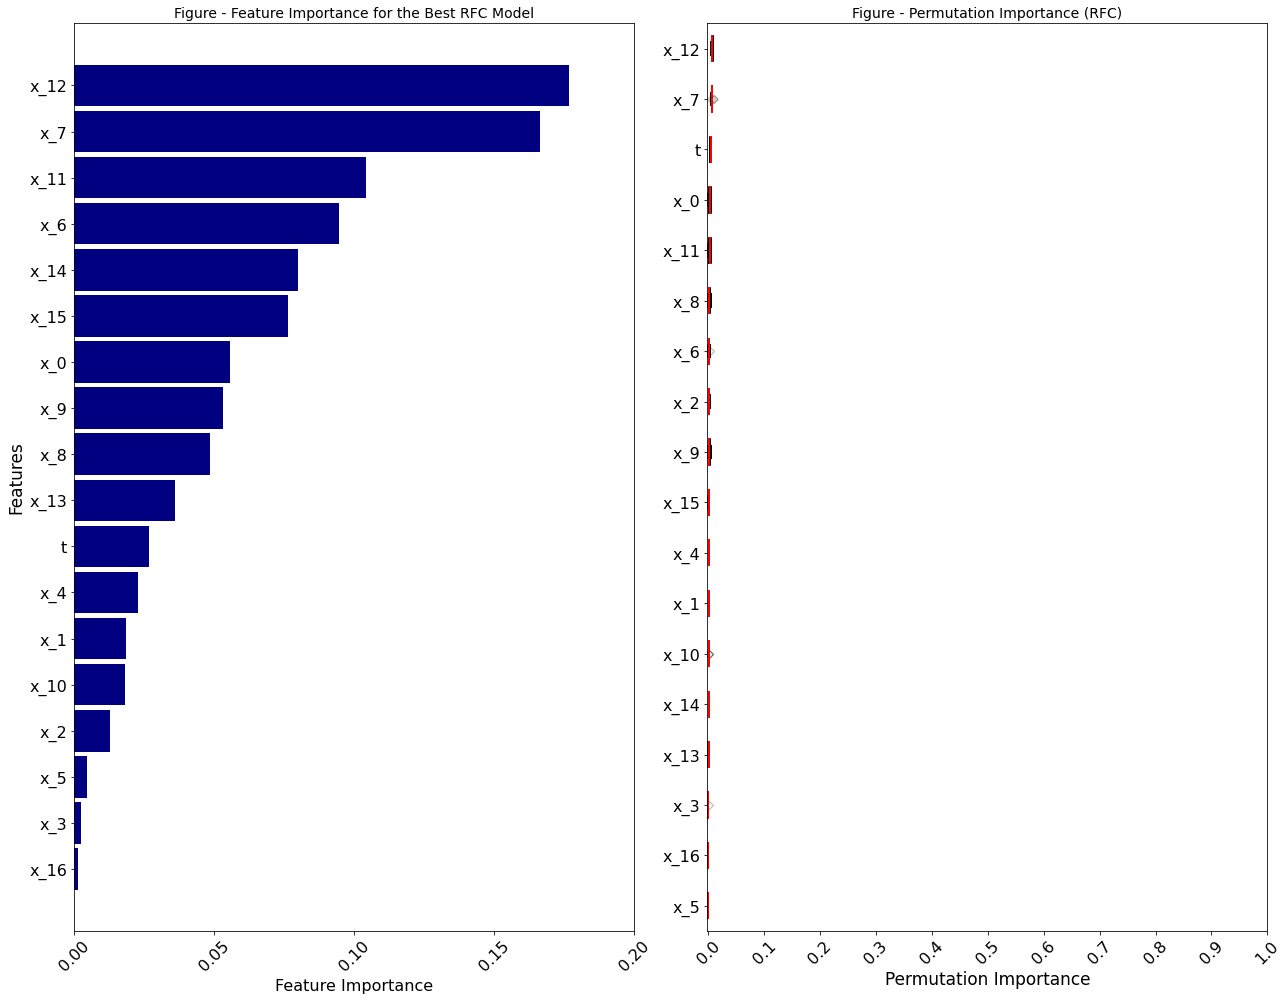

In [90]:
# Plotting feature importances
plt.subplot(1, 2, 1)
plt.barh(x_rfc_best, y_rfc_best, color = 'navy', height = 0.9)
plt.xticks(np.arange(0,max(y_rfc_best)+0.05, 0.05), fontsize=16, rotation=45)
plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.title('Figure - Feature Importance for the Best RFC Model', fontsize=14)
plt.ylabel('Features', fontsize=17)
plt.xlabel('Feature Importance', fontsize=16)


# Set up the size and the space
fig.set_size_inches(14, 8)
plt.subplot(1, 2, 2)

# Plot the Permutation Importance
bp = plt.boxplot(result.importances[sorted_idx].T, vert = 0, labels=np.array(X_jobs_tr_merged.columns)[sorted_idx])

# Set up the colors and line width
for patch in bp['boxes']: 
    patch.set(linewidth = 2)
for whisker in bp['whiskers']: 
    whisker.set(linewidth = 2, 
                linestyle ="-") 
for cap in bp['caps']: 
    cap.set(linewidth = 2)
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 2)
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              alpha = 0.3) 
# Adding details into the graph and displaying it
plt.title("Figure - Permutation Importance (RFC)", fontsize=14)
plt.xticks(np.arange(0,1.1, 0.1),fontsize=16, rotation=45)
plt.yticks(fontsize=16)
fig = plt.gcf()
plt.xlabel('Permutation Importance', fontsize=17)
fig.set_size_inches(18, 14)
fig.tight_layout()
plt.show()

# GBC

In [91]:
#Best GBC
gbc_jobs_best = GradientBoostingClassifier(n_estimators=150,max_depth=3,learning_rate=0.075)
mdl_gbc_jobs_best = gbc_jobs_best.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [92]:
# Sort feature Importances with their labels
y_gbc_best, x_gbc_best = zip(*sorted(zip(mdl_gbc_jobs_best.feature_importances_,X_jobs_tr_merged.columns),reverse=False))

# Results for Permutation Importance
result = permutation_importance(mdl_gbc_jobs_best, X_jobs_tr_merged, y_jobs_tr, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

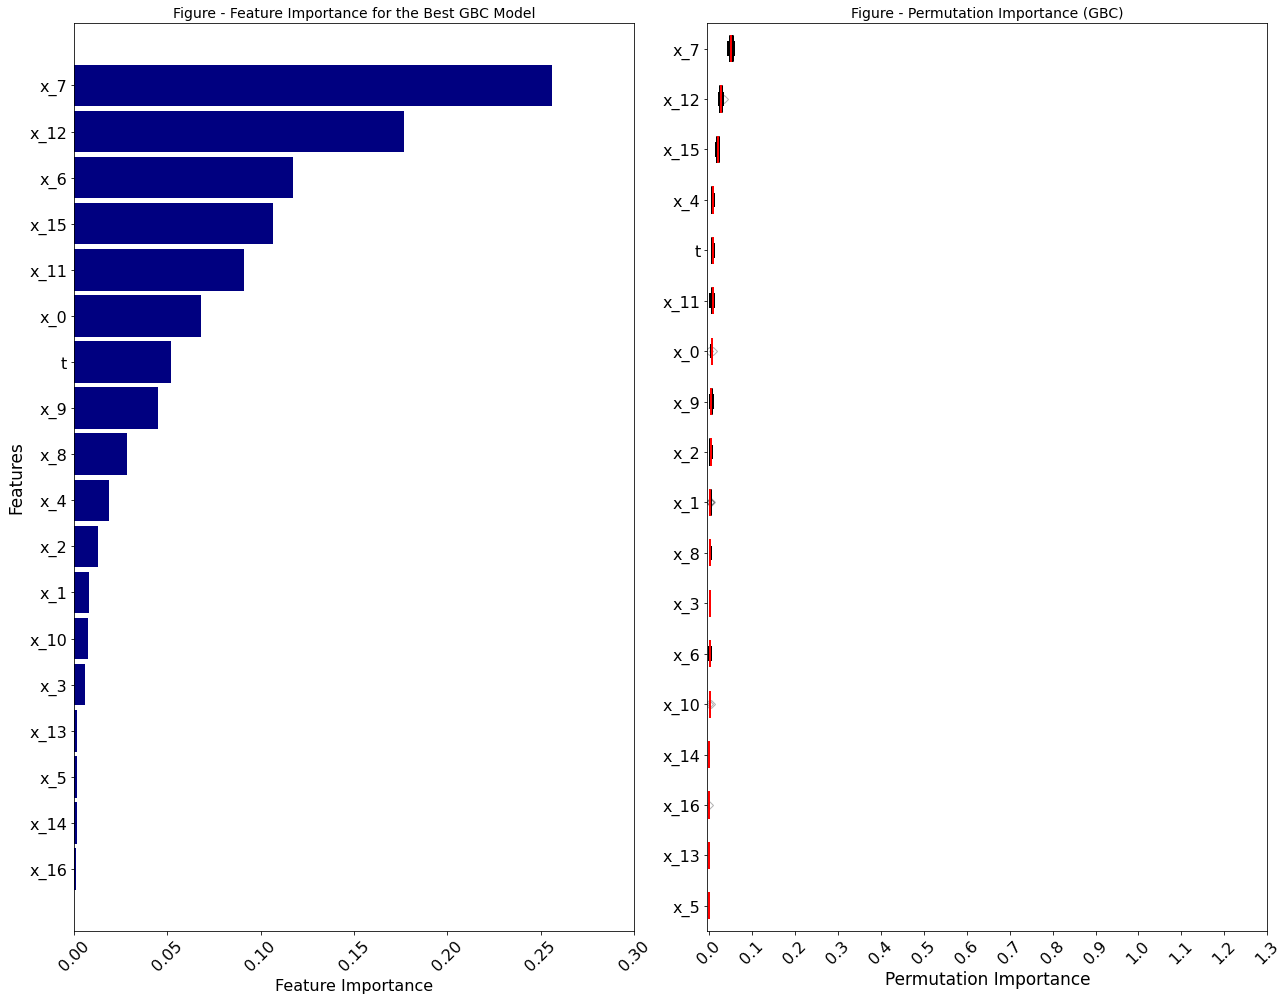

In [93]:
# Plotting feature importances
plt.subplot(1, 2, 1)
plt.barh(x_gbc_best, y_gbc_best, color = 'navy', height = 0.9)
plt.xticks(np.arange(0,max(y_gbc_best)+0.05, 0.05), fontsize=16, rotation=45)
plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.title('Figure - Feature Importance for the Best GBC Model', fontsize=14)
plt.ylabel('Features', fontsize=17)
plt.xlabel('Feature Importance', fontsize=16)


# Set up the size and the space
fig.set_size_inches(14, 8)
plt.subplot(1, 2, 2)

# Plot the Permutation Importance
bp = plt.boxplot(result.importances[sorted_idx].T, vert = 0, labels=np.array(X_jobs_tr_merged.columns)[sorted_idx])

# Set up the colors and line width
for patch in bp['boxes']: 
    patch.set(linewidth = 2)
for whisker in bp['whiskers']: 
    whisker.set(linewidth = 2, 
                linestyle ="-") 
for cap in bp['caps']: 
    cap.set(linewidth = 2)
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 2)
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              alpha = 0.3) 
# Adding details into the graph and displaying it
plt.title("Figure - Permutation Importance (GBC)", fontsize=14)
plt.xticks(np.arange(0,1.4, 0.1),fontsize=16, rotation=45)
plt.yticks(fontsize=16)
fig = plt.gcf()
plt.xlabel('Permutation Importance', fontsize=17)
fig.set_size_inches(18, 14)
fig.tight_layout()
plt.show()


# Propensity score re-weighting



For this section we are going to use a random forest classifier. First we need to train a classifer to predict propensity scores based on background features. We also need a function that calculates sample weights based on these propensity scores.¶

Let's train our classifier to predic propensity scores and then define each of the variables of the IPSW equation: ti, e(x) Note: e(x) can also be referred to as P(ti|xi)


In [113]:
w = lambda t,e: ((t/e)+((1-t)/(1-e)))

In [ ]:
SimpleC_jobs = RandomForestClassifier()

# These will act as our ti values 
ti_jobs = np.squeeze(t_jobs_tr)

# Classifier trained to predict propensity scores
SimpleC_jobs.fit(X_jobs_tr, ti_jobs)

# These will act as our ptx values
ex_jobs= SimpleC_jobs.predict_proba(X_jobs_tr).T[1].T + 0.0001

In [114]:
s_weight = w(ti_jobs, ex_jobs)

In [116]:
# Training variables for random forest 
X_jobs_tr_merged = pd.concat([X_jobs_tr, t_jobs_tr], 1)


rf_jobs_IPSW = RandomForestClassifier()


# Trained regressors
rf_jobs_IPSW.fit(X_jobs_tr_merged,  y_jobs_tr,  sample_weight=s_weight)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

Now we can define our optimized random forest model using the results of the grid serach and evaluate their performances using the usual process (predicting effects for treatment groups and finding the difference between them measured as estimated effects)

In [119]:
params_rfc_jobs_grd =  {
    'n_estimators': [400,480,500,520,600,650],
    'max_depth': [3,4,5,7],
    'bootstrap': [True]
}

rfc_opt_jobs = GridSearchCV(estimator = rfc, param_grid = params_rfc_jobs_grd, cv = 10, n_jobs = -1)

In [118]:
mdl_rfc_grd = rfc_opt_jobs.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [120]:
# Create a dataframe using all results based on grid search and sort them based on the lowest mean score (Average of MSE)
df_rfc_jobs_grd = pd.DataFrame(mdl_rfc_grd.cv_results_).sort_values('mean_test_score', ascending=False)
df_rfc_jobs_grd.reset_index(drop=True,inplace=True)
df_rfc_jobs_grd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.423061,0.040765,0.093801,0.003918,True,7,auto,1,9,650,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.879377,0.891051,0.891051,0.891051,0.879377,0.867704,0.848249,0.891051,0.890625,0.882059,0.013569,1
1,1.835073,0.017922,0.075099,0.010014,True,7,auto,1,6,500,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.883268,0.887160,0.891051,0.894942,0.879377,0.867704,0.844358,0.891051,0.890625,0.882059,0.014642,1
2,2.147670,0.083897,0.090957,0.007036,True,5,auto,2,9,600,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.894942,0.879377,0.883268,0.891051,0.891051,0.875486,0.867704,0.852140,0.887160,0.894531,0.881671,0.012887,3
3,1.868827,0.047054,0.078592,0.007446,True,7,auto,2,9,520,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.879377,0.891051,0.891051,0.891051,0.875486,0.867704,0.848249,0.891051,0.890625,0.881670,0.013695,4
4,2.282331,0.036995,0.087167,0.003032,True,7,auto,1,9,600,"{'bootstrap': True, 'max_depth': 7, 'max_featu...",0.891051,0.879377,0.887160,0.891051,0.894942,0.879377,0.867704,0.844358,0.891051,0.890625,0.881670,0.014657,4


In [109]:

params_gbc_jobs_grd = {
    'n_estimators': [90, 100, 110,200],
    'max_depth': [1,2,3,4],
    'learning_rate': [ 0.04, 0.045, 0.055, 0.1],
}

gbc_opt_jobs = GridSearchCV(estimator = gbc, param_grid = params_gbc_jobs_grd, cv = 10)

In [110]:
mdl_gbc_jobs_grd = gbc_opt_jobs.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

KeyboardInterrupt: 

In [117]:
mdl_gbc_jobs_grd.best_params_

{'learning_rate': 0.055, 'max_depth': 3, 'n_estimators': 90}

In [121]:
# Create a dataframe using all results based on grid search and sort them based on the lowest mean score (Average of MSE)
df_gbc_jobs_rnd = pd.DataFrame(mdl_gbc_jobs_rnd.cv_results_).sort_values('mean_test_score', ascending=False)
df_gbc_jobs_rnd.reset_index(drop=True,inplace=True)
df_gbc_jobs_rnd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.268290,0.015847,0.002586,0.000487,111,2,0.0584211,"{'n_estimators': 111, 'max_depth': 2, 'learnin...",0.885214,0.887160,0.887160,0.850195,0.888889,0.879723,0.014810,1
1,0.122042,0.004061,0.002992,0.000892,50,2,0.143684,"{'n_estimators': 50, 'max_depth': 2, 'learning...",0.881323,0.891051,0.889105,0.848249,0.884990,0.878944,0.015711,2
2,0.121477,0.007978,0.002394,0.000489,50,2,0.243158,"{'n_estimators': 50, 'max_depth': 2, 'learning...",0.887160,0.887160,0.887160,0.842412,0.881092,0.876997,0.017451,3
3,1.139993,0.033952,0.004395,0.000811,111,8,0.03,"{'n_estimators': 111, 'max_depth': 8, 'learnin...",0.885214,0.867704,0.889105,0.856031,0.883041,0.876219,0.012438,4
4,0.346791,0.007356,0.002980,0.001081,50,6,0.03,"{'n_estimators': 50, 'max_depth': 6, 'learning...",0.881323,0.875486,0.885214,0.857977,0.881092,0.876218,0.009634,5


## Metric Evaluation

In [125]:
rf_jobs_IPSW = RandomForestClassifier(bootstrap=True, max_depth=60, n_estimators=600)

rf_jobs_IPSW.fit(X_jobs_tr_merged,  y_jobs_tr,  sample_weight=s_weight)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=60, n_estimators=600)

## Feature Importances for IPSW

In [142]:

IPSW_jobs_best = GradientBoostingClassifier(n_estimators=150,max_depth=3,learning_rate=0.075)
mdl_IPSW_jobs_best= IPSW_jobs_best.fit(X_jobs_tr_merged, y_jobs_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [143]:
# Sort feature Importances with their labels
y_IPSW_best, x_IPSW_best = zip(*sorted(zip(mdl_IPSW_jobs_best.feature_importances_,X_jobs_tr_merged.columns),reverse=False))

# Results for Permutation Importance
result = permutation_importance(mdl_IPSW_jobs_best, X_jobs_tr_merged, y_jobs_tr, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

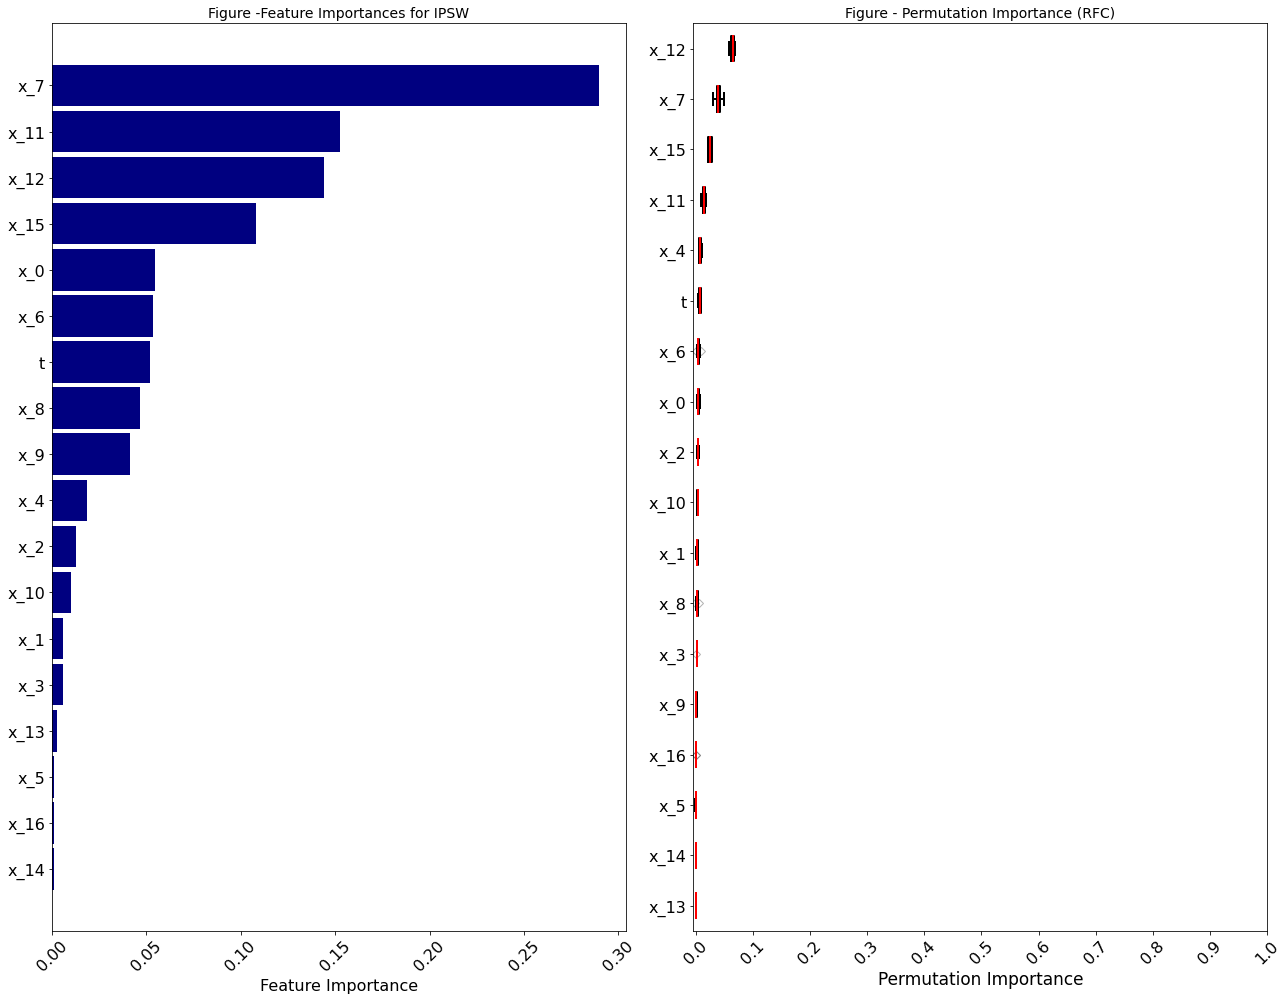

In [144]:
# Plotting feature importances
plt.subplot(1, 2, 1)
plt.barh(x_IPSW_best, y_IPSW_best, color = 'navy', height = 0.9)
plt.xticks(np.arange(0,max(y_IPSW_best)+0.05, 0.05), fontsize=16, rotation=45)
plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.title('Figure -Feature Importances for IPSW', fontsize=14)
#plt.ylabel('Features', fontsize=17)
plt.xlabel('Feature Importance', fontsize=16)


# Set up the size and the space
fig.set_size_inches(14, 8)
plt.subplot(1, 2, 2)

# Plot the Permutation Importance
bp = plt.boxplot(result.importances[sorted_idx].T, vert = 0, labels=np.array(X_jobs_tr_merged.columns)[sorted_idx])

# Set up the colors and line width
for patch in bp['boxes']: 
    patch.set(linewidth = 2)
for whisker in bp['whiskers']: 
    whisker.set(linewidth = 2, 
                linestyle ="-") 
for cap in bp['caps']: 
    cap.set(linewidth = 2)
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 2)
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              alpha = 0.3) 
# Adding details into the graph and displaying it
plt.title("Figure - Permutation Importance (RFC)", fontsize=14)
plt.xticks(np.arange(0,1.1, 0.1),fontsize=16, rotation=45)
plt.yticks(fontsize=16)
fig = plt.gcf()
plt.xlabel('Permutation Importance', fontsize=17)
fig.set_size_inches(18, 14)
fig.tight_layout()
plt.show()

# CATE Estimators

In [154]:
xl_jobs = XLearner(models=RandomForestClassifier(), propensity_model=RandomForestClassifier())
xl_jobs.fit(y_jobs_tr, t_jobs_tr, X=X_jobs_tr)
xl_te_test_jobs = xl_jobs.effect(X_jobs_ts)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [166]:
xl_te_test_jobs = np.array(xl_te_test_jobs).transpose()

In [167]:
outcome = np.array(y_jobs_ts['y']).transpose()
treatment = np.array(t_jobs_ts['t']).transpose()
experiment = np.array(e_jobs_ts['e']).transpose()

In [ ]:
xl_att = epsilon_att(xl_te_test_jobs, outcome, treatment,  experiment)
xl_Rp = policy_risk(xl_te_test_jobs, outcome, treatment,  experiment)